<a href="https://colab.research.google.com/github/0AKLEYYY/CNN-Assignment-2025/blob/main/CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

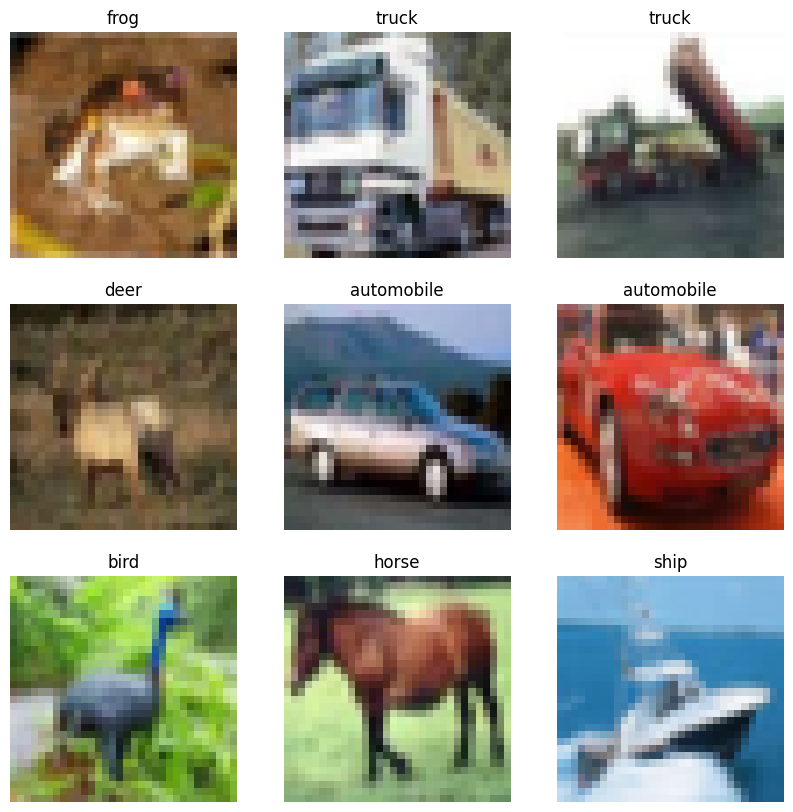

In [49]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [50]:
# Step 3.5: Data Augmentation (Required for Task 3)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)



In [51]:
# Step 4: Build the CNN Model（多加入一層 Conv2D(128)）
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    # 新增第三層
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Display model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,082 (543.29 KB)

 Trainable params: 139,082 (543.29 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
#step5
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping（避免 overfitting）
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# ReduceLROnPlateau（當val_loss停滯就自動降低學習率）
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,       # 每次調降為原本的一半
    patience=3,       # 3 個epoch沒進步就調整
    min_lr=1e-6       # 最低學習率限制，避免變太小
)


In [53]:
# Step 6: Train the Model (with augmentation)
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 134s 120ms/step - accuracy: 0.2622 - loss: 1.9372 - val_accuracy: 0.4659 - val_loss: 1.4684 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 120ms/step - accuracy: 0.4680 - loss: 1.4549 - val_accuracy: 0.5501 - val_loss: 1.2712 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.5281 - loss: 1.3031 - val_accuracy: 0.5580 - val_loss: 1.2476 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.5676 - loss: 1.2113 - val_accuracy: 0.6362 - val_loss: 1.0420 - learning_rate: 0.0010
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.5981 - loss: 1.1213 - val_accuracy: 0.6365 - val_loss: 1.0364 - learning_rate: 0.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 118ms/step - accuracy: 0.6200 - loss: 1.0712 - val_accuracy: 0.6540 - val_loss: 0.9863 - learning_rate: 0.0010
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 

In [54]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 4s - 12ms/step - accuracy: 0.7100 - loss: 0.8316

Test accuracy: 0.7100


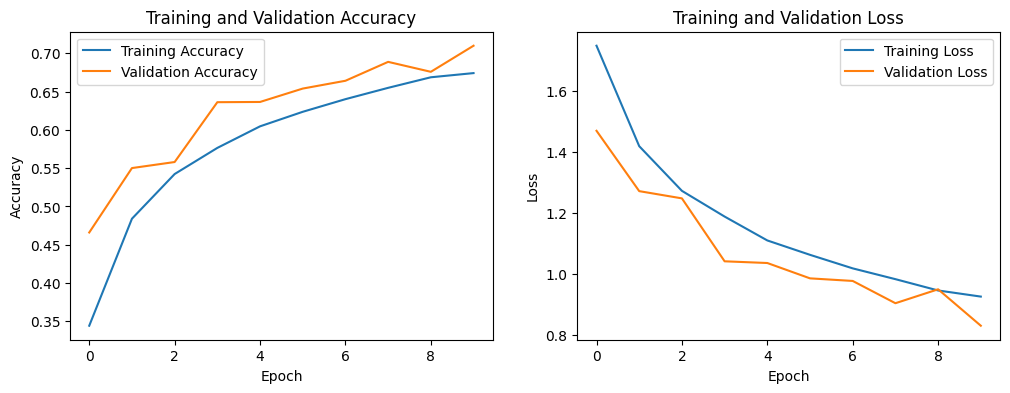

In [55]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [56]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: automobile, True: ship
Image 3: Predicted: automobile, True: ship
Image 4: Predicted: airplane, True: airplane
Image 5: Predicted: frog, True: frog


In [57]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7100
Test Loss: 0.8316
Final Training Accuracy: 0.6742
Final Validation Accuracy: 0.7100
Final Training Loss: 0.9267
Final Validation Loss: 0.8316
Training Epochs: 10
Model Parameters: 139082


#TASK 5: REPORT
這次的功課 我用了三層convolutional layers和max-pooling和防止overfitting的dropout，optimizer的部分我用的是Adam，並設計了EarlyStopping and ReduceLROnPlateau來調整學習率與提早在overfitting前結束訓練，最後我也加入ImageDataGenerator進行資料增強，使模型更有泛化能力。從訓練結果可以看到 validation accuracy 明顯提升，也讓測試集表現更加穩定。